In [6]:
pip install pydqc pandas


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from pydqc import data_summary, data_compare
import matplotlib.pyplot as plt
import warnings
import matplotlib.pyplot as plt

In [ ]:
column_names = ["user_id", "item_id", "rating", "timestamp"]
df = pd.read_csv("ml-100k/ml-100k/u.data", sep="\t", names=column_names)

df.head()


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
# Load data
column_names = ["user_id", "item_id", "rating", "timestamp"]
df1 = pd.read_csv("ml-100k/ml-100k/u.data", sep="\t", names=column_names)

# Corrupted version
df2 = df1.copy()
df2.loc[0:5, 'rating'] = None
df2.loc[10:15, 'item_id'] = -99

# 🔧 Schema (with exactly the expected structure)
schema1 = pd.DataFrame({
    'column': ['user_id', 'item_id', 'rating', 'timestamp'],
    'type': ['int', 'int', 'int', 'int'],
    'include': [1, 1, 1, 1],
    'categorical': [0, 0, 0, 0],
    'manual_annotate': [0, 0, 0, 0]
})

schema2 = schema1.copy()

# ✅ Summary reports
data_summary.data_summary(schema1, df1, "summary1.xlsx")
data_summary.data_summary(schema2, df2, "summary2.xlsx")

# ✅ Comparison
data_compare.data_compare(df1, df2, schema1, schema2, "comparison_results.csv")


KeyError: 'column'

In [ ]:
schema1 = pd.read_excel("data_schema_schema1.xlsx.xlsx")
schema2 = pd.read_excel("data_schema_schema2.xlsx.xlsx")


In [ ]:

# ✅ Monkey-patch plt.hist to replace `normed` with `density`
original_hist = plt.hist
def patched_hist(*args, **kwargs):
    if 'normed' in kwargs:
        warnings.warn("`normed=True` is deprecated. Using `density=True` instead.")
        kwargs['density'] = kwargs.pop('normed')
    return original_hist(*args, **kwargs)

plt.hist = patched_hist  # Apply the patch




TypeError: histogram() got an unexpected keyword argument 'normed'

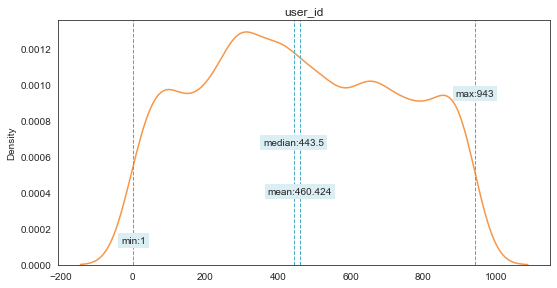

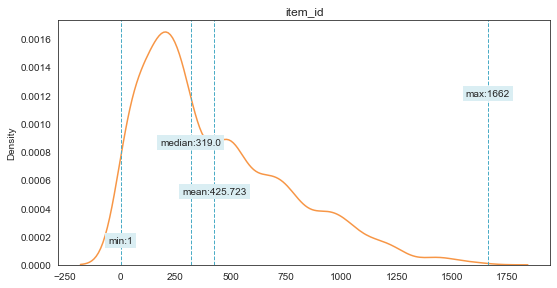

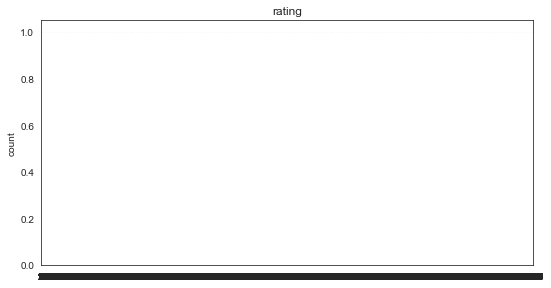

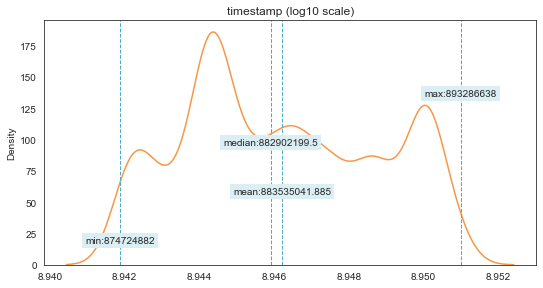

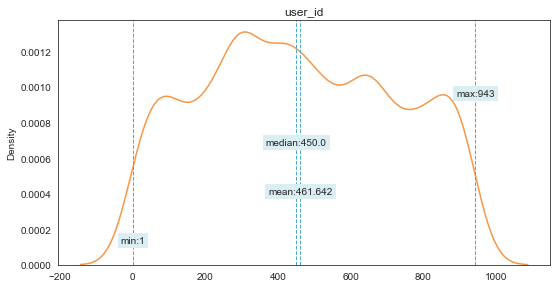

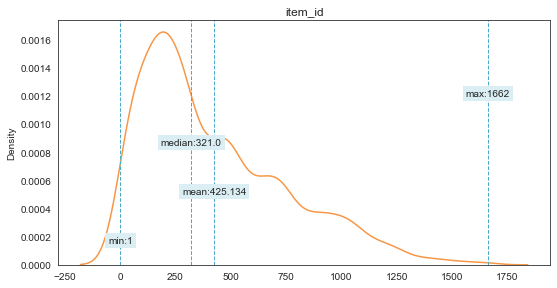

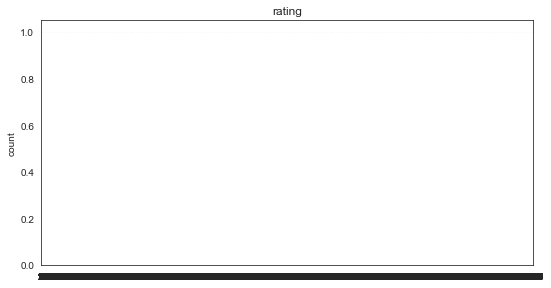

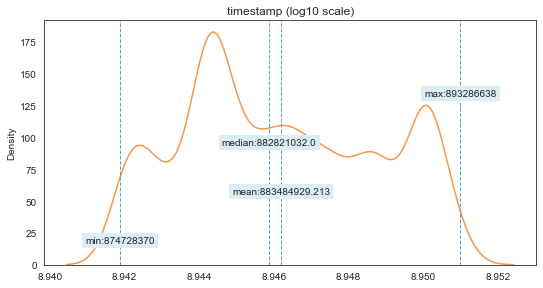

In [ ]:

data_summary.data_summary(schema1, df1, "summary1.xlsx", sample_size=5000)
data_summary.data_summary(schema2, df2, "summary2.xlsx", sample_size=5000)
data_compare.data_compare(df1, df2, schema1, schema2, "comparison_results.csv")


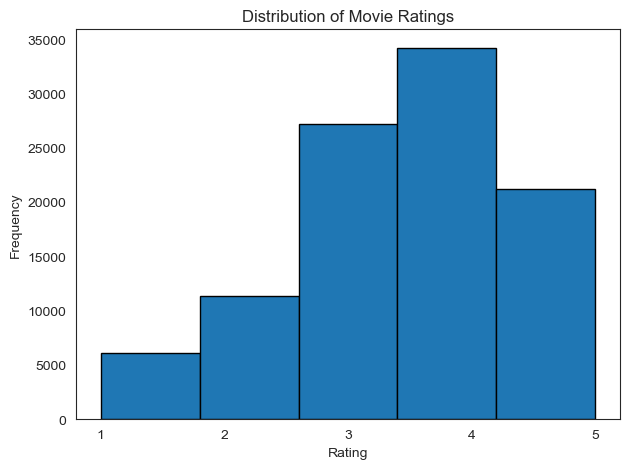

In [ ]:

# Drop NaN ratings to avoid issues
df1['rating'].dropna().astype(int).hist(bins=5, edgecolor='black')

plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.xticks([1, 2, 3, 4, 5])  # MovieLens ratings are 1–5
plt.grid(False)
plt.tight_layout()
plt.show()
